## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib


## Loading dataset

In [2]:
# Load the dataset
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

# Display the first few rows of the dataset
print(df.head())


      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


## Visulaisation

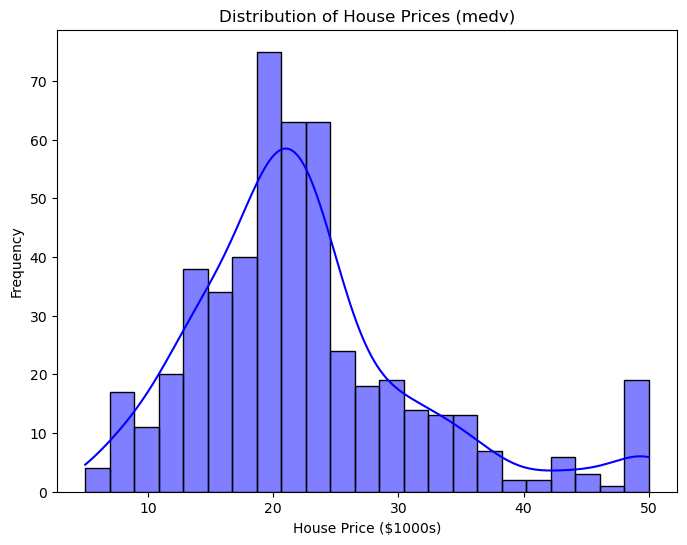

In [3]:
# Distribution of the Target Variable (medv)
plt.figure(figsize=(8, 6))
sns.histplot(df['medv'], kde=True, color='blue')
plt.title('Distribution of House Prices (medv)')
plt.xlabel('House Price ($1000s)')
plt.ylabel('Frequency')
plt.show()


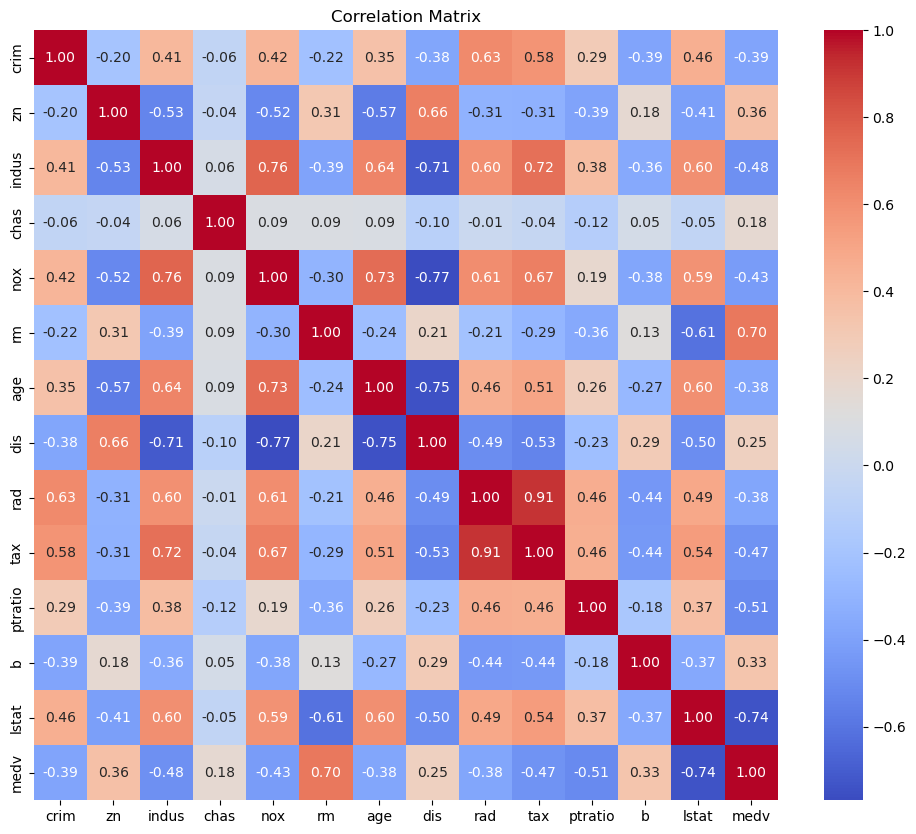

In [4]:
# Corelation Matrix
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


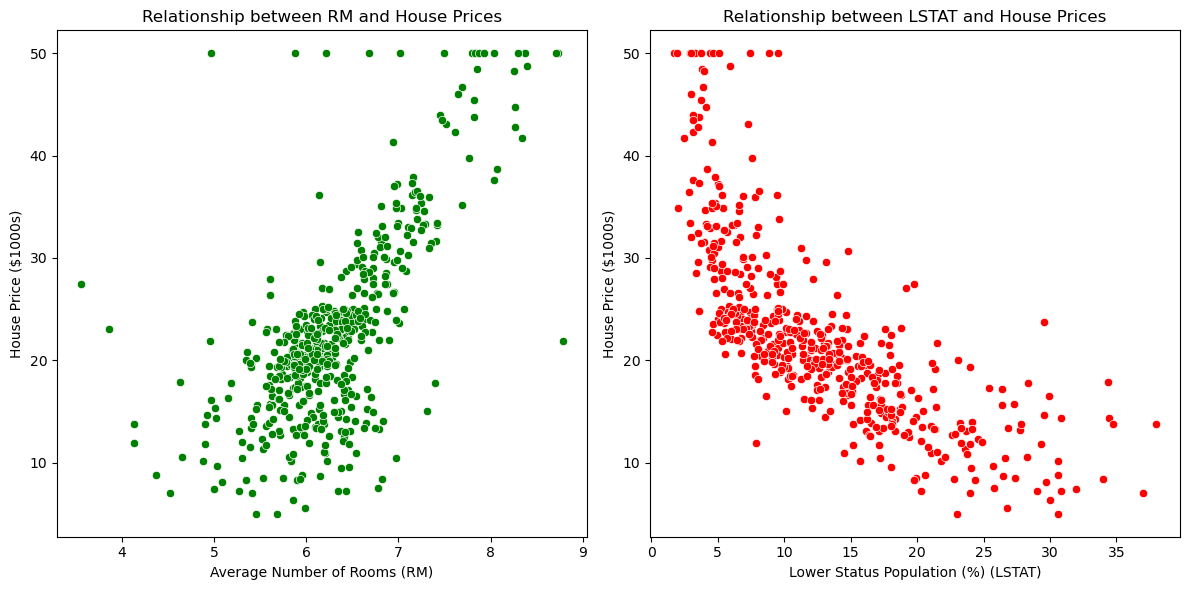

In [5]:
# Relationship Between Features and Target Variable
plt.figure(figsize=(12, 6))

# Plot RM vs medv
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['rm'], y=df['medv'], color='green')
plt.title('Relationship between RM and House Prices')
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('House Price ($1000s)')

# Plot LSTAT vs medv
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['lstat'], y=df['medv'], color='red')
plt.title('Relationship between LSTAT and House Prices')
plt.xlabel('Lower Status Population (%) (LSTAT)')
plt.ylabel('House Price ($1000s)')

plt.tight_layout()
plt.show()


## Define Features and Target Variable

In [6]:
# Identify features and target variable
X = df.drop('medv', axis=1)  # Features
y = df['medv']               # Target variable (house price)


## Split Data

In [7]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Preprocessing pipeline

In [8]:
# Define numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Define preprocessing for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numerical_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ]
)


## Build the Pipeline with Linear Regression

In [9]:
# Create the pipeline with LinearRegression
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])


## Model Training

In [10]:
# Train the model
model_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('model', LinearRegression())])

## Evaluation

In [11]:
# Make predictions
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")


RMSE: 4.928602182665334
MAE: 3.189091965887846
R-squared: 0.6687594935356322


In [12]:
# Save the trained model
joblib.dump(model_pipeline, 'house_price_model.pkl')


['house_price_model.pkl']

In [13]:
# Load the model
loaded_model = joblib.load('house_price_model.pkl')

# Test with a new input
new_input = pd.DataFrame({
    'crim': [0.3],
    'zn': [12.5],
    'indus': [7.0],
    'chas': [0],
    'nox': [0.5],
    'rm': [6.0],
    'age': [44.0],
    'dis': [5.0],
    'rad': [3],
    'tax': [300],
    'ptratio': [16.0],
    'b': [395.0],
    'lstat': [5.0]
})

# Predict the house price
predicted_price = loaded_model.predict(new_input)
print(f"Predicted house price: {predicted_price[0]}")


Predicted house price: 26.669081355460015
